<a href="https://colab.research.google.com/github/jonegreiro/AutoDock_Vina_v_1.1.2./blob/main/Pipeline_do_Autodock_Vina_1_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Pipeline de *Docking* Molecular com Autodock Vina versão 1.1.2**

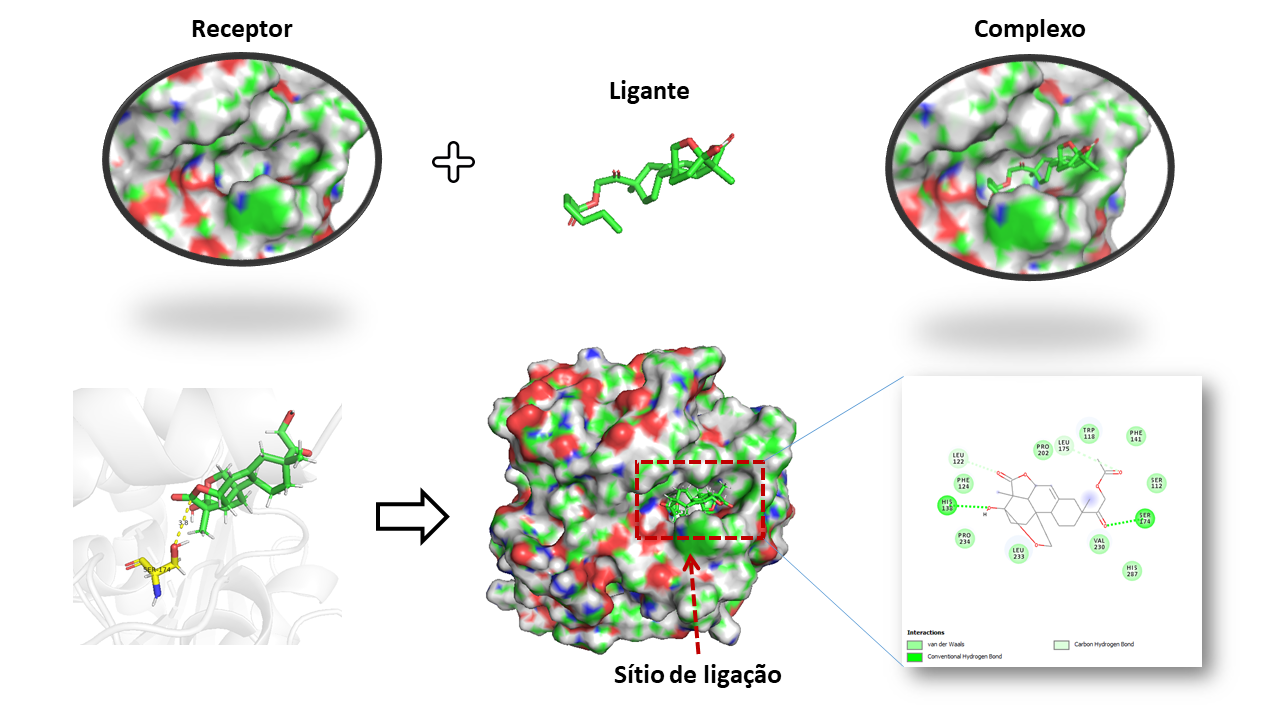


# **Preparação – Instale os pacotes necessários**


Utilizaremos as seguintes bibliotecas e ferramentas para realizar as tarefas mencionadas:


**Biopython:** Esta biblioteca será utilizada para a manipulação dos arquivos PDB, permitindo o acesso e processamento das estruturas moleculares.

**Py3Dmol:** Será empregado para a visualização interativa da estrutura da proteína e para configurar a grade de pesquisa utilizada no processo de docking.

**Miniconda:** Utilizaremos esta versão minimalista e gratuita do Conda para facilitar o gerenciamento dos pacotes de software e ambientes necessários ao projeto.

**OpenBabel:** Essa ferramenta será empregada para a parametrização do(s) ligante(s), preparando-os para a etapa de docking.

**MGLtools:** Será utilizado para parametrizar a proteína alvo, empregando as cargas de Gasteiger, essenciais para o processo de docking.

**PDB2PQR:** Neste pipeline, o PDB2PQR será empregado para realizar a parametrização da proteína, tornando-a pronta para a etapa de docking.

**Autodock Vina:** Esta ferramenta será utilizada para executar o processo de atracamento molecular, possibilitando a predição das interações ligante-proteína.

*Após realizar uma série de testes, chegamos à seguinte configuração recomendada para o ambiente Google Colab neste laboratório*

A instalação dos pacotes Biopython, Py3Dmol e PDB2PQR pode ser feita da seguinte forma:

In [1]:
!pip install py3Dmol
!pip install biopython
!pip install pdb2pqr
!pip install kora
!pip install rdkit-pypi
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.9/206.9 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.5/575.5 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 11.8 MB/s eta 0:00:00
  Attempting uninstall: docutils
    Found existing installation: docutils 0.21.2
    Uninstalling docutils-0.21.2:
      Successfully uninstalled docutils-0.21.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sphinx 8.1.3 requires docutils<0.22,>=0.20, but you have docutils 0.17.1 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 33.2 MB/s eta 0:00:00


In [2]:
# Importando py3Dmol para visualização interativa de estruturas moleculares em 3D
from IPython.display import HTML
import py3Dmol

In [3]:
# Verificando se pdb2pqr foi instalado corretamente
!pdb2pqr30 -h

usage: pdb2pqr [-h] [--ff {AMBER,CHARMM,PARSE,TYL06,PEOEPB,SWANSON}] [--userff USERFF] [--clean]
               [--nodebump] [--noopt] [--keep-chain] [--assign-only]
               [--ffout {AMBER,CHARMM,PARSE,TYL06,PEOEPB,SWANSON}] [--usernames USERNAMES]
               [--apbs-input APBS_INPUT] [--pdb-output PDB_OUTPUT] [--ligand LIGAND]
               [--whitespace] [--neutraln] [--neutralc] [--drop-water] [--include-header]
               [--titration-state-method {propka}] [--with-ph PH] [-f FILENAMES] [-r REFERENCE]
               [-c CHAINS] [-i TITRATE_ONLY] [-t THERMOPHILES] [-a ALIGNMENT] [-m MUTATIONS]
               [-p PARAMETERS] [--log-level {DEBUG,INFO,WARNING,ERROR,CRITICAL}] [-o PH]
               [-w WINDOW WINDOW WINDOW] [-g GRID GRID GRID] [--mutator MUTATOR]
               [--mutator-option MUTATOR_OPTIONS] [-d] [-l] [-k] [-q] [--protonate-all]
               [--version]
               input_path output_pqr

PDB2PQR v3.6.2: biomolecular structure conversion softwa

Vamos instalar o miniconda para poder instalar OpenBabel e MGLtools

In [4]:
# Instalando Miniconda usando a biblioteca conda-colab
!pip install -q condacolab
import condacolab
condacolab.install()


⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:11
🔁 Restarting kernel...


In [1]:
# Configurando o caminho para o Miniconda
import sys
sys.path.append('/root/miniconda3/lib/python3.7/site-packages')

!conda install -c conda-forge -c bioconda mgltools openbabel zlib --yes

Channels:
 - conda-forge
 - bioconda
Platform: linux-64
Solving environment: - \ | / done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.9.2

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - mgltools
    - openbabel
    - zlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.8.30  |       hbcca054_0         155 KB  conda-forge
    cairo-1.18.0               |       h3faef2a_0         959 KB  conda-forge
    certifi-2024.8.30          |     pyhd8ed1ab_0         160 KB  conda-forge
    expat-2.6.4                |       h5888daf_0         135 KB  conda-forge
    font-ttf-dejavu-sans-mono-2.37|       hab24e00_0         388 KB  conda-forge
    font-ttf-inconsolata-3.000 |       h77eed37_

Finalmente, baixe e instale o Autodock Vina

In [2]:
# Baixando e extraindo o Autodock Vina do SCRIPPS
# Em seguida, configuramos um alias para o vina ser tratado como um binário nativo
%%bash
wget https://vina.scripps.edu/wp-content/uploads/sites/55/2020/12/autodock_vina_1_1_2_linux_x86.tgz
tar xzvf autodock_vina_1_1_2_linux_x86.tgz
rm autodock_vina_1_1_2_linux_x86.tgz

autodock_vina_1_1_2_linux_x86/
autodock_vina_1_1_2_linux_x86/LICENSE
autodock_vina_1_1_2_linux_x86/bin/
autodock_vina_1_1_2_linux_x86/bin/vina
autodock_vina_1_1_2_linux_x86/bin/vina_split


--2024-11-25 12:14:01--  https://vina.scripps.edu/wp-content/uploads/sites/55/2020/12/autodock_vina_1_1_2_linux_x86.tgz
Resolving vina.scripps.edu (vina.scripps.edu)... 192.26.252.19
Connecting to vina.scripps.edu (vina.scripps.edu)|192.26.252.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1238242 (1.2M) [application/x-gzip]
Saving to: ‘autodock_vina_1_1_2_linux_x86.tgz’

     0K .......... .......... .......... .......... ..........  4% 2.23M 1s
    50K .......... .......... .......... .......... ..........  8% 2.23M 0s
   100K .......... .......... .......... .......... .......... 12%  133M 0s
   150K .......... .......... .......... .......... .......... 16% 4.49M 0s
   200K .......... .......... .......... .......... .......... 20%  229M 0s
   250K .......... .......... .......... .......... .......... 24%  244M 0s
   300K .......... .......... .......... .......... .......... 28% 4.62M 0s
   350K .......... .......... .......... .......... .......... 

In [3]:
# Configurando o caminho para o Autodock Vina
import os
os.environ['PATH'] += ":/content/autodock_vina_1_1_2_linux_x86/bin"

In [4]:
# Verificando se o Autodock Vina foi instalado corretamente
!vina --help


Input:
  --receptor arg        rigid part of the receptor (PDBQT)
  --flex arg            flexible side chains, if any (PDBQT)
  --ligand arg          ligand (PDBQT)

Search space (required):
  --center_x arg        X coordinate of the center
  --center_y arg        Y coordinate of the center
  --center_z arg        Z coordinate of the center
  --size_x arg          size in the X dimension (Angstroms)
  --size_y arg          size in the Y dimension (Angstroms)
  --size_z arg          size in the Z dimension (Angstroms)

Output (optional):
  --out arg             output models (PDBQT), the default is chosen based on 
                        the ligand file name
  --log arg             optionally, write log file

Misc (optional):
  --cpu arg                 the number of CPUs to use (the default is to try to
                            detect the number of CPUs or, failing that, use 1)
  --seed arg                explicit random seed
  --exhaustiveness arg (=8) exhaustiveness of the glo

# **Parte 1 - Preparação do alvo molecular**


Nesta etapa, procederemos com a preparação do alvo molecular para o processo de re-*docking*. Siga as instruções abaixo:

1. Baixe o arquivo do alvo molecular no formato PDB da fonte desejada, [clique aqui](https://www.rcsb.org/) e escolha o alvo molecular de interesse.

2. Utilizando a biblioteca py3Dmol, visualize a estrutura tridimensional do alvo molecular a partir do arquivo PDB baixado.

3. Realize eventuais pré-processamentos, como remoção de água e contraíon, e extraia somente os resíduos proteicos relevantes.

4. Salve a versão modificada do alvo molecular em um novo arquivo PDB e realize a parametrização necessária.

5. Extraia o ligante co-cristalizado, e em seguida, realize a parametrização e obtenção das coordenadas espaciais.

6. Verifique se todos os arquivos necessários estão disponíveis para o processo de re-*docking*.

*Assegure-se de seguir as diretrizes apropriadas para a preparação do receptor, considerando os requisitos específicos do Autodock Vina e seguindo as melhores práticas para a preparação de proteínas para o docking molecular.*

In [6]:
import urllib.request

#@title **Passo 1. Digite o ID PDB de interesse**
#@markdown Digite o ID PDB do alvo molecular de interesse.

pdb_id = input("Digite o ID PDB: ")

def baixar_pdb(pdb_id):
    url = f"https://files.rcsb.org/download/{pdb_id}.pdb"
    nome_arquivo = f"{pdb_id}.pdb"
    urllib.request.urlretrieve(url, nome_arquivo)
    print(f"O arquivo {nome_arquivo} foi baixado com sucesso!")

baixar_pdb(pdb_id)

Digite o ID PDB: 3kk6
O arquivo 3kk6.pdb foi baixado com sucesso!


In [7]:
import py3Dmol
import os
from ipywidgets import widgets, interact

#@title Visualizar o alvo molecular

def visualize_pdb(pdb_filename):
    with open(pdb_filename, 'r') as pdb_file:
        pdb_data = pdb_file.read()

    view = py3Dmol.view(width=800, height=600)
    view.addModel(pdb_data, 'pdb')

    view.setStyle({'cartoon': {'color': 'spectrum'}})

    view.setStyle({'hetflag': True}, {'stick': {}})

    view.setStyle({'resn': 'HOH'}, {'sphere': {'opacity': 0.5}})

    view.setStyle({'hetflag': True, 'resn': '!HOH'}, {'stick': {}})

    view.zoomTo()
    view.show()

pdb_files = [file for file in os.listdir() if file.endswith(".pdb")]

pdb_dropdown = widgets.Dropdown(
    options=pdb_files,
    description='PDB file:',
    style={'description_width': 'initial'}
)
display(pdb_dropdown)

def visualize_selected_pdb(b):
    pdb_filename = pdb_dropdown.value
    visualize_pdb(pdb_filename)

button = widgets.Button(description="Visualizar")
display(button)
button.on_click(visualize_selected_pdb)

Dropdown(description='PDB file:', options=('5ikr.pdb', '3kk6.pdb'), style=DescriptionStyle(description_width='…

Button(description='Visualizar', style=ButtonStyle())

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [8]:
import os
import ipywidgets as widgets
from IPython.display import display

#@title **Passo 2. Extraia residuos não proteícos**
#@markdown Esse processo irá resultar na geração de uma estrutura do alvo molecular limpo, específica para o *docking* molecular.\
#@markdown As cadeias individuais do receptor serão extraídas e salvas em arquivos separados.

pdb_files = [file for file in os.listdir() if file.endswith(".pdb")]

pdb_dropdown = widgets.Dropdown(
    options=pdb_files,
    description='PDB file:',
    style={'description_width': 'initial'}
)
display(pdb_dropdown)

button = widgets.Button(description="Extrair proteína")
display(button)

def separate_chain(pdb_file):
    chains = set()
    with open(pdb_file, 'r') as f:
        for line in f:
            if line.startswith('ATOM'):
                chain_id = line[21]
                chains.add(chain_id)

    file_base = os.path.splitext(pdb_file)[0]

    for chain_id in chains:
        chain_file = f"{file_base}_chain_{chain_id}.pdb"
        with open(chain_file, 'w') as f_out, open(pdb_file, 'r') as f_in:
            for line in f_in:
                if line.startswith('ATOM') and line[21] == chain_id:
                    f_out.write(line)

        print(f"+ Chain {chain_id} extracted from {pdb_file} --> {chain_file}")

def extract_protein(b):
    pdb_file = pdb_dropdown.value
    separate_chain(pdb_file)

button.on_click(extract_protein)

Dropdown(description='PDB file:', options=('5ikr.pdb', '3kk6.pdb'), style=DescriptionStyle(description_width='…

Button(description='Extrair proteína', style=ButtonStyle())

+ Chain B extracted from 3kk6.pdb --> 3kk6_chain_B.pdb
+ Chain A extracted from 3kk6.pdb --> 3kk6_chain_A.pdb


# **Preparação do alvo molecular**

Neste estágio crucial do *pipeline*, é essencial garantir que o alvo molecular contenha todos os hidrogênios polares necessários para estabelecer ligações de hidrogênio com o ligante. É importante ressaltar que muitas estruturas proteicas disponíveis não possuem hidrogênios atribuídos, o que torna imprescindível adicioná-los para garantir a precisão e efetividade do nosso experimento.

**Realize a adição dos hidrogênios polares ao alvo molecular e faça a parametrização com base no pKa de cada aminoácido em um pH desejado, utilizando o campo de força de sua escolha. Essa etapa pode ser feita utilizando o pdb2pqr, seguida pela exclusão dos hidrogênios apolares e conversão do arquivo para o formato PDBQT utilizando o MGLtools.**

No processo mencionado, o pdb2pqr gera um arquivo intermediário chamado PQR, que é uma modificação do formato PDB, permitindo a adição de parâmetros de carga e raio aos dados existentes. Essa informação permanece inalterada durante o uso do MGLtools.


In [19]:
#@title **Passo 3. Parametrizando o alvo molecular utilizando o pdb2pqr e em seguida obtendo o PDBQT com MGLtools**

import os
import shutil
import ipywidgets as widgets
from IPython.display import display

# Listar arquivos PDB disponíveis
pdb_files = [f for f in os.listdir('.') if f.endswith('.pdb')]

# Inicializa o dropdown para selecionar o arquivo .pdb
pdb_dropdown = widgets.Dropdown(
    options=[''] + pdb_files,  # Primeira opção em branco, seguida pelos arquivos .pdb
    description='Arquivo:',
    value=''  # Inicialmente em branco
)

# Exibe o widget de dropdown para seleção de arquivo PDB
display(pdb_dropdown)

# Função para iniciar o processo de parametrização quando um arquivo for selecionado
def on_pdb_selected(change):
    if pdb_dropdown.value:  # Continua apenas se um arquivo for selecionado
        chosen_pdb = pdb_dropdown.value
        print(f"Arquivo selecionado: {chosen_pdb}")

        # Pasta de saída
        dock_dir = f"redocking"
        os.makedirs(dock_dir, exist_ok=True)

        # Caixa de texto para pH
        ph_input = widgets.Text(
            value='7.0',
            description='pH:',
        )
        display(ph_input)

        # Lista de campos de força
        force_fields = ['AMBER', 'CHARMM', 'OPLS', 'GROMACS']

        # Inicializa o dropdown para selecionar o campo de força
        force_field_dropdown = widgets.Dropdown(
            options=[''] + force_fields,  # Primeira opção em branco
            description='Campo FF:',
            value=''  # Inicialmente em branco
        )
        display(force_field_dropdown)

        # Função para quando o campo de força for selecionado
        def on_force_field_selected(change):
            if force_field_dropdown.value:  # Continua apenas se um campo de força for selecionado
                chosen_force_field = force_field_dropdown.value
                ph = ph_input.value

                print(f"Campo de força selecionado: {chosen_force_field}")
                print(f"pH de trabalho: {ph}")
                print("Processando...")  # Mensagem de processamento

                # Executar pdb2pqr
                os.system(f"pdb2pqr30 --ff {chosen_force_field} --chain A --titration-state-method propka --with-ph {ph} {chosen_pdb} {dock_dir}/{chosen_pdb[:-4]}.pqr")

                # Gerar arquivo PDBQT
                os.system(f"prepare_receptor4.py -r {dock_dir}/{chosen_pdb[:-4]}.pqr -o {dock_dir}/{chosen_pdb[:-4]}.pdbqt -A checkhydrogens -U nphs_lps -v")

                print(f"Arquivo {chosen_pdb[:-4]}.pdbqt gerado e salvo na pasta {dock_dir}.")

        # Observa quando o campo de força for selecionado
        force_field_dropdown.observe(on_force_field_selected, names='value')

# Ativa a função de seleção do arquivo PDB
pdb_dropdown.observe(on_pdb_selected, names='value')


Dropdown(description='Arquivo:', options=('', '3kk6_chain_A.pdb', '5ikr.pdb', '3kk6.pdb', '3kk6_chain_B.pdb'),…

Arquivo selecionado: 3kk6_chain_A.pdb


Text(value='7.0', description='pH:')

Dropdown(description='Campo FF:', options=('', 'AMBER', 'CHARMM', 'OPLS', 'GROMACS'), value='')

Campo de força selecionado: AMBER
pH de trabalho: 7.4
Processando...
Arquivo 3kk6_chain_A.pdbqt gerado e salvo na pasta redocking.


In [ ]:
#@title Visualize o alvo PDBQT

import py3Dmol
import os
from ipywidgets import widgets, interact

def visualize_pdb(pdb_filename, representation):
    with open(pdb_filename, 'r') as pdb_file:
        pdb_data = pdb_file.read()

    view = py3Dmol.view(width=800, height=600)
    view.addModel(pdb_data, 'pdb')

    if representation == 'cartoon':
        view.setStyle({'cartoon': {'color': 'spectrum'}})
    elif representation == 'sticks':
        view.setStyle({'stick': {}})

    view.zoomTo()
    view.show()

dock_dir = [dir for dir in os.listdir() if dir.startswith("redocking")]
if not dock_dir:
    print("Diretório de docking não encontrado. Execute o código anterior para criar o diretório.")
    exit()

pdbqt_files = [file for file in os.listdir(dock_dir[0]) if file.endswith(".pdbqt")]

pdbqt_dropdown = widgets.Dropdown(
    options=pdbqt_files,
    description='PDBQT file:',
    style={'description_width': 'initial'}
)
display(pdbqt_dropdown)

representation_dropdown = widgets.Dropdown(
    options=['cartoon', 'sticks'],
    description='Representation:',
    style={'description_width': 'initial'}
)
display(representation_dropdown)

def visualize_selected_pdbqt(b):
    pdbqt_filename = os.path.join(dock_dir[0], pdbqt_dropdown.value)
    representation = representation_dropdown.value
    visualize_pdb(pdbqt_filename, representation)

button = widgets.Button(description="Visualizar")
display(button)
button.on_click(visualize_selected_pdbqt)

Dropdown(description='PDBQT file:', options=('3kk6_chain_A.pdbqt',), style=DescriptionStyle(description_width=…

Dropdown(description='Representation:', options=('cartoon', 'sticks'), style=DescriptionStyle(description_widt…

Button(description='Visualizar', style=ButtonStyle())

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [ ]:
#@title **Passo 4. Extrair o ligante co-cristalizado para re-*docking***
#@markdown Verifique no **Protein Data Bank (PDB)** as informações sobre o ligante co-cristalizado.

#@markdown Anote o nome do resíduo e a cadeia do ligante.


import os
import ipywidgets as widgets
from IPython.display import display


def extract_ligand_residue(pdb_filename, ligand_resname, chain_id=None):
    with open(pdb_filename, 'r') as pdb_file:
        pdb_data = pdb_file.readlines()

    ligand_residues = []

    for line in pdb_data:
        if line.startswith("HETATM"):
            resname = line[17:20].strip()
            chain = line[21]
            if resname == ligand_resname and (chain_id is None or chain == chain_id):
                ligand_residues.append(line)

    return ligand_residues


def write_ligand_pdb(pdb_filename, ligand_residues):
    pdb_basename = os.path.splitext(pdb_filename)[0]
    ligand_pdb_filename = f"{pdb_basename}_ligante.pdb"

    with open(ligand_pdb_filename, 'w') as ligand_pdb_file:
        ligand_pdb_file.writelines(ligand_residues)

    print(f"Arquivo {ligand_pdb_filename} gerado com sucesso!")


pdb_files = [file for file in os.listdir('.') if file.endswith('.pdb')]
pdb_dropdown = widgets.Dropdown(
    options=pdb_files,
    description='PDB file:'
)

ligand_resname_input = widgets.Text(
    description='Ligand ID:'
)

chain_id_input = widgets.Text(
    description='Cadeia do Ligante:'
)

run_button = widgets.Button(description='Extrair')


def run_button_clicked(b):
    pdb_filename = pdb_dropdown.value
    ligand_resname = ligand_resname_input.value
    chain_id = chain_id_input.value

    ligand_residues = extract_ligand_residue(pdb_filename, ligand_resname, chain_id)
    if ligand_residues:
        print("Resíduos do ligante encontrados:")
        for residue in ligand_residues:
            print(residue.strip())
        write_ligand_pdb(pdb_filename, ligand_residues)
    else:
        print("Nenhum resíduo do ligante encontrado para o resíduo e cadeia especificados.")


run_button.on_click(run_button_clicked)

display(pdb_dropdown, ligand_resname_input, chain_id_input, run_button)

Dropdown(description='PDB file:', options=('3kk6_chain_A.pdb', '3kk6.pdb', '3kk6_chain_B.pdb'), value='3kk6_ch…

Text(value='', description='Ligand ID:')

Text(value='', description='Cadeia do Ligante:')

Button(description='Extrair', style=ButtonStyle())

Resíduos do ligante encontrados:
HETATM17586  S1  CEL A 701     -32.393  42.095 -10.638  1.00121.17           S
HETATM17587  C15 CEL A 701     -32.274  42.150  -8.857  1.00 94.72           C
HETATM17588  C14 CEL A 701     -33.203  42.787  -8.128  1.00 72.96           C
HETATM17589  C13 CEL A 701     -33.081  42.811  -6.744  1.00 62.90           C
HETATM17590  C12 CEL A 701     -32.033  42.117  -6.114  1.00 72.25           C
HETATM17591  C17 CEL A 701     -31.181  41.335  -6.849  1.00 80.93           C
HETATM17592  C16 CEL A 701     -31.221  41.391  -8.190  1.00 95.48           C
HETATM17593  N2  CEL A 701     -31.994  41.958  -4.710  1.00 78.48           N
HETATM17594  C3  CEL A 701     -32.118  42.854  -3.788  1.00 66.66           C
HETATM17595  C5  CEL A 701     -32.329  44.321  -3.950  1.00 54.41           C
HETATM17596  C10 CEL A 701     -33.377  44.862  -3.343  1.00 71.37           C
HETATM17597  C9  CEL A 701     -33.631  46.214  -3.451  1.00 68.49           C
HETATM17598  C8  CE

In [ ]:
#@title Visualize o ligante co-cristalizado
import py3Dmol
import os
from ipywidgets import widgets, interact

def visualize_pdb(pdb_filename):
    with open(pdb_filename, 'r') as pdb_file:
        pdb_data = pdb_file.read()

    view = py3Dmol.view(width=800, height=600)
    view.addModel(pdb_data, 'pdb')

    view.setStyle({'cartoon': {'color': 'spectrum'}})

    view.setStyle({'hetflag': True}, {'stick': {}})

    view.setStyle({'resn': 'HOH'}, {'sphere': {'opacity': 0.5}})

    view.setStyle({'hetflag': True, 'resn': '!HOH'}, {'stick': {}})

    view.zoomTo()
    view.show()

pdb_files = [file for file in os.listdir() if file.endswith(".pdb")]

pdb_dropdown = widgets.Dropdown(
    options=pdb_files,
    description='PDB file:',
    style={'description_width': 'initial'}
)
display(pdb_dropdown)

def visualize_selected_pdb(b):
    pdb_filename = pdb_dropdown.value
    visualize_pdb(pdb_filename)

button = widgets.Button(description="Visualizar")
display(button)
button.on_click(visualize_selected_pdb)

Dropdown(description='PDB file:', options=('3kk6_chain_A.pdb', '3kk6.pdb', '3kk6_chain_B.pdb', '3kk6_ligante.p…

Button(description='Visualizar', style=ButtonStyle())

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [ ]:
#@title **Passo 5. Parametrização do ligante co-cristalizado com definição de pH e diretório de destino**
#@markdown Este passo do código é responsável pela
#@markdown conversão de arquivos PDB
#@markdown para arquivos PDBQT, permitindo
#@markdown a especificação de um pH personalizado para as moléculas.

#@markdown *O formato PDBQT é essencial para a execução*
#@markdown *e acoplamentos moleculares usando a ferramenta AutoDock Vina.*

import openbabel
import os
import ipywidgets as widgets
from IPython.display import display
import tkinter as tk
from tkinter import filedialog

def convert_pdb_to_pdbqt(pdb_filename, pdbqt_filename, pH):
    conv = openbabel.OBConversion()
    conv.SetInAndOutFormats("pdb", "pdbqt")

    mol = openbabel.OBMol()
    conv.ReadFile(mol, pdb_filename)

    mol.SetTitle(f"pH={pH:.1f}")
    mol.AddHydrogens(False, True, pH)

    charge_model = openbabel.OBChargeModel.FindType("gasteiger")
    charge_model.ComputeCharges(mol)

    conv.WriteFile(mol, pdbqt_filename)

pdb_files = [file for file in os.listdir('.') if file.endswith('.pdb')]

pdb_dropdown = widgets.Dropdown(
    options=pdb_files,
    description='Ligand file:'
)

pH_input = widgets.FloatText(
    description='pH:'
)

directory_input = widgets.Text(
    value='redocking',
    description='Diretório de destino:'
)

button = widgets.Button(description='Converter')

def convert_button_clicked(b):
    pdb_filename = pdb_dropdown.value
    pdbqt_filename = pdb_filename.replace('.pdb', '.pdbqt')
    pH = pH_input.value
    destination_directory = directory_input.value

    pdbqt_filepath = os.path.join(destination_directory, pdbqt_filename)

    convert_pdb_to_pdbqt(pdb_filename, pdbqt_filepath, pH)
    print(f"Conversão concluída. Arquivo {pdbqt_filepath} gerado com sucesso!")

button.on_click(convert_button_clicked)

display(pdb_dropdown, pH_input, directory_input, button)

Dropdown(description='Ligand file:', options=('3kk6_chain_A.pdb', '3kk6.pdb', '3kk6_chain_B.pdb', '3kk6_ligant…

FloatText(value=0.0, description='pH:')

Text(value='redocking', description='Diretório de destino:')

Button(description='Converter', style=ButtonStyle())

Conversão concluída. Arquivo redocking/3kk6_ligante.pdbqt gerado com sucesso!


/usr/local/lib/python3.10/site-packages/openbabel/__init__.py:14: UserWarning: "import openbabel" is deprecated, instead use "from openbabel import openbabel"
  warnings.warn('"import openbabel" is deprecated, instead use "from openbabel import openbabel"')


In [ ]:
#@title **Passo 6. Geração do arquivo conf.txt com coordenadas espaciais**

#@markdown Nesta etapa, é necessário configurar os
#@markdown parâmetros para a criação do arquivo conf.txt,
#@markdown que conterá as coordenadas espaciais para o
#@markdown processo de *docking* molecular.

#@markdown *Você deve especificar o alvo molecular (PBD), o receptor (PDBQT), o resíduo do ligante e a cadeia*
#@markdown *que serão usados no processo.*
#@markdown *Além disso, é fundamental definir os*
#@markdown *parâmetros de exaustividade (exhaustiveness) e o número de modos (num_modes).*

#@markdown Obrservação: As informações fornecidas, como o **resíduo do ligante** e a **cadeia**, serão usadas para determinar as coordenadas do ligante co-cristalizado, que servirão como referência para o processo de *docking* molecular.


import ipywidgets as widgets
from IPython.display import display
import os
import shutil

def get_ligand_coordinates(pdb_filename, ligand_resname, chain_id=None):
    with open(pdb_filename, 'r') as pdb_file:
        pdb_data = pdb_file.readlines()

    ligand_coordinates = []

    for line in pdb_data:
        if line.startswith("HETATM"):
            resname = line[17:20].strip()
            chain = line[21]
            if resname == ligand_resname and (chain_id is None or chain == chain_id):
                x = float(line[30:38].strip())
                y = float(line[38:46].strip())
                z = float(line[46:54].strip())
                ligand_coordinates.append((x, y, z))

    return ligand_coordinates

def calculate_grid_parameters(ligand_coordinates, padding=8.0):
    min_x = min(coord[0] for coord in ligand_coordinates)
    max_x = max(coord[0] for coord in ligand_coordinates)
    min_y = min(coord[1] for coord in ligand_coordinates)
    max_y = max(coord[1] for coord in ligand_coordinates)
    min_z = min(coord[2] for coord in ligand_coordinates)
    max_z = max(coord[2] for coord in ligand_coordinates)

    center_x = (max_x + min_x) / 2.0
    center_y = (max_y + min_y) / 2.0
    center_z = (max_z + min_z) / 2.0

    size_x = max_x - min_x + padding
    size_y = max_y - min_y + padding
    size_z = max_z - min_z + padding

    return center_x, center_y, center_z, size_x, size_y, size_z

def generate_conf_file(receptor_pdbqt, ligand_coordinates, padding=8.0, exhaustiveness=16, num_modes=30):
    center_x, center_y, center_z, size_x, size_y, size_z = calculate_grid_parameters(ligand_coordinates, padding)

    conf_data = f"""
receptor = {receptor_pdbqt}
out = out.pdbqt

center_x = {center_x}
center_y = {center_y}
center_z = {center_z}

size_x = {size_x}
size_y = {size_y}
size_z = {size_z}

exhaustiveness = {exhaustiveness}
num_modes = {num_modes}
"""

    return conf_data

def display_conf_file(conf_data):
    print(conf_data)

pdb_files = [file for file in os.listdir('.') if file.endswith('.pdb')]
pdb_dropdown = widgets.Dropdown(
    options=pdb_files,
    description='PDB file:'
)

receptor_files = [file for file in os.listdir('.') if file.endswith('.pdbqt')]
receptor_dropdown = widgets.Dropdown(
    options=receptor_files,
    description='Receptor.pdbqt:'
)

ligand_resname_input = widgets.Text(
    description='Ligand ID:'
)

chain_id_input = widgets.Text(
    description='Cadeia do Ligante'
)
exhaustiveness_input = widgets.IntText(
    value=16,
    description='Exhaustiveness:'
)

num_modes_input = widgets.IntText(
    value=30,
    description='Num Modes:'
)

run_button = widgets.Button(description='Executar')

def run_button_clicked(b):
    pdb_filename = pdb_dropdown.value
    receptor_pdbqt = receptor_dropdown.value
    ligand_resname = ligand_resname_input.value
    chain_id = chain_id_input.value
    exhaustiveness = exhaustiveness_input.value
    num_modes = num_modes_input.value

    ligand_coordinates = get_ligand_coordinates(pdb_filename, ligand_resname, chain_id)

    dock_dir = f"redocking"
    os.makedirs(dock_dir, exist_ok=True)

    conf_data = generate_conf_file(receptor_pdbqt, ligand_coordinates, exhaustiveness=exhaustiveness, num_modes=num_modes)

    conf_file_path = os.path.join(dock_dir, 'conf.txt')
    with open(conf_file_path, 'w') as conf_file:
        conf_file.write(conf_data)

    display_conf_file(conf_data)

run_button.on_click(run_button_clicked)

display(pdb_dropdown, receptor_dropdown, ligand_resname_input, chain_id_input, exhaustiveness_input, num_modes_input, run_button)

Dropdown(description='PDB file:', options=('3kk6_chain_A.pdb', '3kk6.pdb', '3kk6_chain_B.pdb', '3kk6_ligante.p…

Dropdown(description='Receptor.pdbqt:', options=('3kk6_chain_A.pdbqt',), value='3kk6_chain_A.pdbqt')

Text(value='', description='Ligand ID:')

Text(value='', description='Cadeia do Ligante')

IntText(value=16, description='Exhaustiveness:')

IntText(value=30, description='Num Modes:')

Button(description='Executar', style=ButtonStyle())


receptor = 3kk6_chain_A.pdbqt
out = out.pdbqt

center_x = -32.4825
center_y = 43.84
center_z = -6.345

size_x = 12.185000000000002
size_y = 18.324000000000005
size_z = 19.119999999999997

exhaustiveness = 16
num_modes = 30



# **Parte 2 - Re-*docking* molecular**

In [ ]:
#@title Mudar o diretorio para o re-*docking*

import os

dock_dir = "/content/redocking"

os.chdir(dock_dir)

In [ ]:
#@title Obter a lista de arquivos no diretório atual
#@markdown Confira se tem todos os arquivos necessários para rodar o Autodock Vina.

#@markdown **receptor.pdbqt**;

#@markdown **ligante.pdbqt**;

#@markdown **conf.txt**;

import os

files = os.listdir()

for file in files:
    print(file)


conf.txt
3kk6_chain_A.pqr
3kk6_chain_A.pdbqt
3kk6_ligante.pdbqt
3kk6_chain_A.log


In [ ]:
#@title **Passo 7. Geração do script vina_vs.sh para executar o AutoDock Vina**
#@markdown Neste passo, vamos criar um script chamado vina_vs.sh e, em seguida, executá-lo para rodar o AutoDock Vina.

import os
import subprocess

current_dir = os.getcwd()

script_filename = os.path.join(current_dir, "vina_vs.sh")

script_content = '''\
#!/bin/bash
for f in *.pdbqt; do
    b=$(basename "$f" .pdbqt)
    echo "Processing ligand $b"
    vina --config conf.txt --ligand "$f" --out "${b}_out.pdbqt" --log "${b}_log.txt"
done
'''

with open(script_filename, 'w') as script_file:
    script_file.write(script_content)

subprocess.run(["chmod", "+x", script_filename])

!bash vina_vs.sh

Processing ligand 3kk6_chain_A
#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 2 CPUs
Reading input ... 

Parse error on line 1 in file "3kk6_chain_A.pdbqt": Unknown or inappropria

**Validação do re-*docking* molecular através da análise de sobreposição e RMSD**

*Nesta etapa do pipeline, procederemos à validação da técnica computacional através do re-docking molecular por meio de uma análise criteriosa da sobreposição entre as estruturas e do valor do RMSD.*

A sobreposição entre as estruturas obtidas durante o processo de re-*docking* será minuciosamente examinada, e o valor do RMSD será calculado para avaliar a precisão das predições.

Considerando os resultados, se o valor do RMSD for menor que 2.0 Å (Angströms), poderemos afirmar que a técnica computacional foi validado com sucesso.

Essa etapa é crucial para assegurar a confiabilidade das técnicas empregadas e obter insights relevantes sobre a acurácia do *docking* molecular realizado. Os resultados obtidos aqui influenciarão diretamente no prosseguimento do *pipeline* e nas conclusões finais do experimento.

**Conversão de arquivos PDBQT para PDB usando OpenBabel**

Nos passos 8 e 9, realizaremos a conversão dos arquivos selecionados do formato .pdbqt para .pdb utilizando a biblioteca OpenBabel.
Em seguida realizaremos os cálculos de RMSD (*Root-Mean-Square Deviation*).


In [ ]:
#@title **Passo 8. Extrair as poses da etapa de re-*docking***

import os
import openbabel
import ipywidgets as widgets

def extract_pose(file_path, output_directory, pose_index):
    with open(file_path, 'r') as file:
        content = file.read()

    poses = content.split('MODEL')

    if len(poses) > pose_index:
        pose_content = 'MODEL' + poses[pose_index]

        pose_file_path = os.path.join(output_directory, f'pose_{pose_index}.pdbqt')
        with open(pose_file_path, 'w') as pose_file:
            pose_file.write(pose_content)

        print(f"Pose {pose_index} extraída e salva como {pose_file_path}")
        return pose_file_path
    else:
        print(f"Pose {pose_index} não encontrada.")
        return None

def convert_pdbqt_to_pdb(input_path, output_path):
    pdbqt = openbabel.OBMol()
    conv = openbabel.OBConversion()
    conv.SetInAndOutFormats("pdbqt", "pdb")
    conv.ReadFile(pdbqt, input_path)
    conv.WriteFile(pdbqt, output_path)

pdbqt_files = [file for file in os.listdir('.') if file.endswith('.pdbqt')]

pdbqt_dropdown = widgets.Dropdown(
    options=pdbqt_files,
    description='File PDBQT:'
)

def update_pose_options(change):
    file_path = os.path.join('.', pdbqt_dropdown.value)
    with open(file_path, 'r') as file:
        content = file.read()
    poses = content.split('MODEL')
    pose_dropdown.options = [f"Pose {i}" for i in range(1, len(poses))]
    pose_dropdown.value = pose_dropdown.options[0]

pose_dropdown = widgets.Dropdown(
    options=[],
    description='Pose a extrair:'
)

def convert_button_clicked(b):
    pdbqt_filename = pdbqt_dropdown.value
    file_path = os.path.join('.', pdbqt_filename)

    selected_pose_index = int(pose_dropdown.value.split()[-1])
    extracted_pose_path = extract_pose(file_path, '.', selected_pose_index)

    if extracted_pose_path:
        output_pdb_path = os.path.splitext(extracted_pose_path)[0] + "_converted.pdb"
        convert_pdbqt_to_pdb(extracted_pose_path, output_pdb_path)

        print(f"Conversão concluída. Arquivo .pdb salvo como: {output_pdb_path}")

convert_button = widgets.Button(description='Extrair e Converter Pose')

pdbqt_dropdown.observe(update_pose_options, names='value')
convert_button.on_click(convert_button_clicked)

display(pdbqt_dropdown, pose_dropdown, convert_button)



Dropdown(description='File PDBQT:', options=('3kk6_chain_A.pdbqt', '3kk6_ligante_out.pdbqt', '3kk6_ligante.pdb…

Dropdown(description='Pose a extrair:', options=(), value=None)

Button(description='Extrair e Converter Pose', style=ButtonStyle())

Pose 1 extraída e salva como ./pose_1.pdbqt
Conversão concluída. Arquivo .pdb salvo como: ./pose_1_converted.pdb


/usr/local/lib/python3.10/site-packages/openbabel/__init__.py:14: UserWarning: "import openbabel" is deprecated, instead use "from openbabel import openbabel"
  warnings.warn('"import openbabel" is deprecated, instead use "from openbabel import openbabel"')


Pose 2 extraída e salva como ./pose_2.pdbqt
Conversão concluída. Arquivo .pdb salvo como: ./pose_2_converted.pdb
Pose 3 extraída e salva como ./pose_3.pdbqt
Conversão concluída. Arquivo .pdb salvo como: ./pose_3_converted.pdb
Pose 4 extraída e salva como ./pose_4.pdbqt
Conversão concluída. Arquivo .pdb salvo como: ./pose_4_converted.pdb


In [ ]:
#@title **Passo 9. Conversão do ligante co-cristalizado**
import os
import glob
import openbabel
import ipywidgets as widgets

def convert_pdbqt_to_pdb(input_path, output_path):
    pdbqt = openbabel.OBMol()
    conv = openbabel.OBConversion()
    conv.SetInAndOutFormats("pdbqt", "pdb")
    conv.ReadFile(pdbqt, input_path)

    conv.WriteFile(pdbqt, output_path)

pdbqt_files = [file for file in os.listdir('.') if file.endswith('.pdbqt')]

pdbqt_dropdown = widgets.Dropdown(
    options=pdbqt_files,
    description='Arquivo PDBQT:'
)

output_directory = '.'

def convert_button_clicked(b):
    pdbqt_filename = pdbqt_dropdown.value
    input_path = os.path.join('.', pdbqt_filename)

    output_pdb_path = os.path.splitext(input_path)[0] + ".pdb"

    convert_pdbqt_to_pdb(input_path, output_pdb_path)

    print(f"Conversão concluída. Arquivo .pdb salvo como: {output_pdb_path}")

convert_button = widgets.Button(description='Converter PDBQT para PDB')

convert_button.on_click(convert_button_clicked)

display(pdbqt_dropdown, convert_button)


Dropdown(description='Arquivo PDBQT:', options=('3kk6_chain_A.pdbqt', '3kk6_ligante_out.pdbqt', 'pose_4.pdbqt'…

Button(description='Converter PDBQT para PDB', style=ButtonStyle())

Conversão concluída. Arquivo .pdb salvo como: ./3kk6_ligante.pdb


In [ ]:
#@title **Visualizar a sobreposição do ligante co-cristalizado com a pose da etapa de re-*docking* e calcular o RMSD**

#@markdown Nesta etapa, vamos calcular o RMSD entre o ligante co-cristalizado e a pose do re-*docking*.

#@markdown *Observação: Às vezes, a pose com a melhor energia pode não apresentar o melhor RMSD; certifique-se de verificar as outras poses.*

import numpy as np
from Bio import PDB
import tempfile
import os
import ipywidgets as widgets
import glob
import py3Dmol

def align_structures(reference_structure, mobile_structure):
    def filter_heavy_atoms(structure):
        return [atom for atom in structure.get_atoms() if atom.element != "H"]

    fixed_atoms = filter_heavy_atoms(reference_structure)
    moving_atoms = filter_heavy_atoms(mobile_structure)

    super_imposer = PDB.Superimposer()
    super_imposer.set_atoms(fixed_atoms, moving_atoms)
    super_imposer.apply(mobile_structure.get_atoms())

    rmsd = super_imposer.rms

    return rmsd

def load_and_visualize_pdb_files(_):
    reference_file = reference_file_widget.value
    mobile_file = mobile_file_widget.value

    parser = PDB.PDBParser(QUIET=True)
    reference_structure = parser.get_structure("reference", reference_file)
    mobile_structure = parser.get_structure("mobile", mobile_file)

    rmsd = align_structures(reference_structure[0], mobile_structure[0])

    temp_pdb_file = tempfile.NamedTemporaryFile(suffix=".pdb", delete=False)
    io = PDB.PDBIO()
    io.set_structure(mobile_structure)
    io.save(temp_pdb_file.name)
    temp_pdb_file.close()

    rmsd_filename = "rmsd_info.txt"
    with open(rmsd_filename, "w") as rmsd_file:
        rmsd_file.write(f"Nome do arquivo de referência: {reference_file}\n")
        rmsd_file.write(f"Nome do arquivo móvel: {mobile_file}\n")
        rmsd_file.write(f"RMSD após o alinhamento: {rmsd:.4f} Å")

    viewer = py3Dmol.view(width=400, height=400)

    with open(reference_file, 'r') as f:
        viewer.addModel(f.read(), 'pdb')
    viewer.setStyle({'model': 0}, {'stick': {}})  # Referência com estilo padrão

    with open(temp_pdb_file.name, 'r') as f:
        viewer.addModel(f.read(), 'pdb')
    viewer.setStyle({'model': 1}, {'stick': {'colorscheme': 'greenCarbon'}})  # Móvel com esquema de cor verde

    viewer.zoomTo()
    viewer.show()

    rmsd_label.value = f'RMSD após o alinhamento: {rmsd:.4f} Å'

    os.remove(temp_pdb_file.name)

pdb_files = glob.glob("*.pdb")

reference_file_widget = widgets.Dropdown(options=pdb_files, description="Referência:")
mobile_file_widget = widgets.Dropdown(options=pdb_files, description="Móvel:")
visualize_button = widgets.Button(description="Visualizar")
visualize_button.on_click(load_and_visualize_pdb_files)

rmsd_label = widgets.Label()

display(widgets.VBox([
    widgets.Label("Escolha os arquivos .pdb:"),
    reference_file_widget,
    mobile_file_widget,
    visualize_button,
    rmsd_label
]))


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [ ]:
#Voltar para o diretório anterior
os.chdir("..")

In [ ]:
#@title Crie um diretório chamado "docking"

import os

diretorio_destino = '/content/docking'

if not os.path.exists(diretorio_destino):
    os.mkdir(diretorio_destino)
    print(f"Diretório '{diretorio_destino}' criado com sucesso!")
else:
    print(f"O diretório '{diretorio_destino}' já existe.")


Diretório '/content/docking' criado com sucesso!


# Instruções para a próxima etapa do *pipeline*

1.   Primeira execução do re-*docking* molecular:

  *   Se esta é a sua primeira vez realizando o re-*docking* molecular, execute a **Etapa A**.

2.   Execuções anteriores e arquivos disponíveis:

  *   Se você já realizou o re-*docking* molecular anteriormente e possui os arquivos necessários (como receptor.pdbqt e conf.txt) em sua máquina, vá para a **Etapa B** e faça o *upload* desses arquivos para o ambiente de trabalho.



In [ ]:
#@title Etapa A
#@markdown Insira o número correspondente aos arquivos:

#@markdown **receptor.pdbqt (utilizado na etapa de re-*docking*) e conf.txt**

import os
import shutil

diretorio_origem = '/content/redocking'
diretorio_destino = '/content/docking'

if not os.path.exists(diretorio_origem):
    print("O diretório de origem não existe. Verifique o caminho e tente novamente.")
else:
    arquivos_no_diretorio = os.listdir(diretorio_origem)

    print("Arquivos disponíveis no diretório de origem:")
    for i, arquivo in enumerate(arquivos_no_diretorio, start=1):
        print(f"{i}. {arquivo}")

    escolha = input("Digite os números dos arquivos separados por vírgula (exemplo: 1,2): ")

    numeros_escolhidos = [int(x.strip()) for x in escolha.split(',') if x.strip().isdigit()]

    for numero in numeros_escolhidos:
        if 1 <= numero <= len(arquivos_no_diretorio):
            arquivo_escolhido = arquivos_no_diretorio[numero - 1]
            caminho_origem = os.path.join(diretorio_origem, arquivo_escolhido)
            caminho_destino = os.path.join(diretorio_destino, arquivo_escolhido)
            shutil.copy(caminho_origem, caminho_destino)
            print(f"Arquivo '{arquivo_escolhido}' copiado para o diretório '{diretorio_destino}' com sucesso!")
        else:
            print(f"O número {numero} não corresponde a nenhum arquivo válido.")


Arquivos disponíveis no diretório de origem:
1. 3kk6_ligante_log.txt
2. conf.txt
3. 3kk6_chain_A.pqr
4. pose_3_converted.pdb
5. 3kk6_chain_A_log.txt
6. pose_2_converted.pdb
7. pose_1_converted.pdb
8. 3kk6_chain_A.pdbqt
9. pose_4_converted.pdb
10. rmsd_info.txt
11. 3kk6_ligante_out.pdbqt
12. pose_4.pdbqt
13. pose_3.pdbqt
14. 3kk6_ligante.pdbqt
15. pose_1.pdbqt
16. pose_2.pdbqt
17. 3kk6_ligante.pdb
18. 3kk6_chain_A.log
19. vina_vs.sh
Digite os números dos arquivos separados por vírgula (exemplo: 1,2): 2,8
Arquivo 'conf.txt' copiado para o diretório '/content/docking' com sucesso!
Arquivo '3kk6_chain_A.pdbqt' copiado para o diretório '/content/docking' com sucesso!


In [ ]:
#@title Etapa B
#@markdown Realize o *upload* do **receptor.pdbqt** e **conf.txt** da sua máquina.

from google.colab import files
import os
import shutil

diretorio_destino = '/content/docking'

if not os.path.exists(diretorio_destino):
    os.mkdir(diretorio_destino)
    print(f"Diretório '{diretorio_destino}' criado com sucesso!")

print("Selecione os arquivos para fazer o upload:")
uploaded_files = files.upload()

for filename in uploaded_files.keys():
    caminho_destino = os.path.join(diretorio_destino, filename)
    shutil.move(filename, caminho_destino)
    print(f"Arquivo '{filename}' movido para o diretório '{diretorio_destino}' com sucesso!")


Selecione os arquivos para fazer o upload:


# **Preparação dos ligantes para o AutoDock Vina**

Após validar a técnica computacional com o re-*docking*, vamos agora proceder à preparação dos ligantes para o AutoDock Vina. Siga atentamente as instruções abaixo:

1. Insira o(s) SMILES do(s) ligante(s).

2. Utilize o Openbabel para converter os SMILES em um formato 3D MOL2 e, em seguida, realize uma minimização de energia do conformero utilizando a força de campo GAFF. Posteriormente, faça a conversão para o formato PDBQT, ajustando o pH conforme necessário.

3. Verifique se todos os arquivos necessários para executar o AutoDock Vina estão presentes no diretório de trabalho.

Assegure-se de seguir as diretrizes apropriadas para o preparo do ligante, levando em consideração os requisitos específicos do AutoDock Vina e seguindo as melhores práticas para a preparação dos ligantes para o *docking*.

# **Parte 3 - *Docking* molecular**

In [ ]:
#@title Criar uma pasta "ligands"
#@markdown Insira o codigo SMILES quando solicitado

import os
from pathlib import Path

ligandpath = Path("/content/ligands/")

if not os.path.exists(ligandpath):
    os.makedirs(ligandpath)
    print("O caminho dos ligantes foi criado com sucesso")

smiles = input("Digite o SMILES da molécula: ")
nome_arquivo = input("Digite o nome do arquivo (sem extensão): ")

arquivo_path = ligandpath / (nome_arquivo + ".smiles")
arquivo_path.write_text(smiles)

print(f"SMILES salvo com sucesso no arquivo: {arquivo_path}")


Digite o SMILES da molécula: C[C@@H](c1ccc(cc1)C(=O)c2ccc(s2)I)C(=O)O
Digite o nome do arquivo (sem extensão): Ligante_14
SMILES salvo com sucesso no arquivo: /content/ligands/Ligante_14.smiles


In [ ]:
#@title Use o seguinte visualizador para carregar seus SMILES como uma molécula 3D
#@markdown Visualize os ligantes

import os
import ipywidgets
import py3Dmol
import kora.install.rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from pathlib import Path
import glob

def MolTo3DView(mol, size=(300, 300), style="stick", surface=False, opacity=0.5):
    assert style in ('line', 'stick', 'sphere', 'carton')
    mblock = Chem.MolToMolBlock(mol)
    viewer = py3Dmol.view(width=size[0], height=size[1])
    viewer.addModel(mblock, 'mol')
    viewer.setStyle({style:{}})
    if surface:
        viewer.addSurface(py3Dmol.SAS, {'opacity': opacity})
    viewer.zoomTo()
    return viewer

def smi2conf(smiles):
    '''Convert SMILES to rdkit.Mol with 3D coordinates'''
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        mol = Chem.AddHs(mol)
        AllChem.EmbedMolecule(mol)
        AllChem.MMFFOptimizeMolecule(mol, maxIters=200)
        return mol
    else:
        return None

ligandpath = "/content/ligands"

arquivos_smiles = glob.glob(os.path.join(ligandpath, "*.smiles"))

if not arquivos_smiles:
    print("Nenhum arquivo .smiles encontrado no diretório.")
else:
    dropdown = ipywidgets.Dropdown(
        options=[os.path.basename(file) for file in arquivos_smiles],
        description='Arquivo .smiles:',
    )
    display(dropdown)

def on_visualizar_button_clicked(b):
    arquivo_path = os.path.join(ligandpath, dropdown.value)
    if os.path.exists(arquivo_path):
        smiles = Path(arquivo_path).read_text()
        conf = smi2conf(smiles)
        if conf:
            viewer = MolTo3DView(conf)
            viewer.show()
        else:
            print("Erro ao converter o arquivo .smiles para molécula 3D.")
    else:
        print("O arquivo não existe. Por favor, verifique o nome do arquivo.")

visualizar_button = ipywidgets.Button(description="Visualizar")
visualizar_button.on_click(on_visualizar_button_clicked)
display(visualizar_button)


Dropdown(description='Arquivo .smiles:', options=('Ligante_14.smiles', 'Ligante08.smiles', 'Ligante_06.smiles'…

Button(description='Visualizar', style=ButtonStyle())

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [ ]:
#@title **Converter SMILES em MOL2**

#@markdown Essa célula será utilizada para conversão dos SMILES em MOL2 utilizando o Openbabel


# -*- coding: utf-8 -*-
import os

def convert_smiles_to_mol2(input_smiles, output_mol2):
    cmd = "obabel {} -O {} --gen3d --best --canonical --minimize --ff GAFF --steps 10000 --sd".format(input_smiles, output_mol2)
    os.system(cmd)

def main():
    ligands_dir = "/content/ligands"
    smiles_files = [f for f in os.listdir(ligands_dir) if f.endswith('.smiles')]

    if not smiles_files:
        print("Nenhum arquivo .smiles encontrado na pasta /content/ligands.")
        return

    print("Arquivos .smiles encontrados na pasta /content/ligands:")
    for idx, smiles_file in enumerate(smiles_files):
        print("{}. {}".format(idx + 1, smiles_file))

    for smiles_file in smiles_files:
        input_smiles = os.path.join(ligands_dir, smiles_file)
        output_mol2 = os.path.join(ligands_dir, os.path.splitext(smiles_file)[0] + ".mol2")
        convert_smiles_to_mol2(input_smiles, output_mol2)

    print("Conversão e minimização de energia concluídas para todos os arquivos .smiles.")
    print("Os arquivos .mol2 foram salvos na pasta /content.")

if __name__ == "__main__":
    main()


Arquivos .smiles encontrados na pasta /content/ligands:
1. Ligante_14.smiles
2. Ligante08.smiles
3. Ligante_06.smiles
4. Ligante_10.smiles
5. Ligante_12.smiles
6. Ligante_07.smiles
7. Ligante_11.smiles
8. Ligante_09.smiles
9. Ligante_13.smiles
Conversão e minimização de energia concluídas para todos os arquivos .smiles.
Os arquivos .mol2 foram salvos na pasta /content.


In [ ]:
#@title **Converter MOL2 em PDBQT**
#@markdown Vamos converter os ligantes utilizando a ferramenta Openbabel em pH de trabalho

import openbabel
import os
import ipywidgets as widgets
from IPython.display import display
import tkinter as tk
from tkinter import filedialog

def convert_mol2_to_pdbqt(mol2_filename, pdbqt_filename, pH):
    conv = openbabel.OBConversion()
    conv.SetInAndOutFormats("mol2", "pdbqt")

    mol = openbabel.OBMol()
    conv.ReadFile(mol, mol2_filename)

    mol.SetTitle(f"pH={pH:.1f}")
    mol.AddHydrogens(False, True, pH)

    charge_model = openbabel.OBChargeModel.FindType("gasteiger")
    charge_model.ComputeCharges(mol)

    conv.WriteFile(mol, pdbqt_filename)

ligands_dir = '/content/ligands'
mol2_files = [file for file in os.listdir(ligands_dir) if file.endswith('.mol2')]

if not mol2_files:
    print("Nenhum arquivo .mol2 encontrado na pasta /content/ligands.")
else:
    print("Arquivos .mol2 encontrados na pasta /content/ligands:")
    for idx, mol2_file in enumerate(mol2_files):
        print(f"{idx + 1}. {mol2_file}")

    pH_input = widgets.FloatText(
        description='pH:'
    )

    directory_input = widgets.Text(
        value='/content/docking',
        description='Diretório de destino:'
    )

    button = widgets.Button(description='Converter')

    def convert_button_clicked(b):
        pH = pH_input.value
        destination_directory = directory_input.value

        for mol2_file in mol2_files:
            mol2_filepath = os.path.join(ligands_dir, mol2_file)
            pdbqt_filename = mol2_file.replace('.mol2', '.pdbqt')
            pdbqt_filepath = os.path.join(destination_directory, pdbqt_filename)

            convert_mol2_to_pdbqt(mol2_filepath, pdbqt_filepath, pH)
            print(f"Conversão concluída. Arquivo {pdbqt_filepath} gerado com sucesso!")

    button.on_click(convert_button_clicked)

    display(pH_input, directory_input, button)


Arquivos .mol2 encontrados na pasta /content/ligands:
1. Ligante_06.mol2
2. Ligante08.mol2
3. Ligante_07.mol2
4. Ligante_09.mol2
5. Ligante_14.mol2
6. Ligante_12.mol2
7. Ligante_11.mol2
8. Ligante_13.mol2
9. Ligante_10.mol2


FloatText(value=0.0, description='pH:')

Text(value='/content/docking', description='Diretório de destino:')

Button(description='Converter', style=ButtonStyle())

Conversão concluída. Arquivo /content/docking/Ligante_06.pdbqt gerado com sucesso!
Conversão concluída. Arquivo /content/docking/Ligante08.pdbqt gerado com sucesso!
Conversão concluída. Arquivo /content/docking/Ligante_07.pdbqt gerado com sucesso!
Conversão concluída. Arquivo /content/docking/Ligante_09.pdbqt gerado com sucesso!
Conversão concluída. Arquivo /content/docking/Ligante_14.pdbqt gerado com sucesso!
Conversão concluída. Arquivo /content/docking/Ligante_12.pdbqt gerado com sucesso!
Conversão concluída. Arquivo /content/docking/Ligante_11.pdbqt gerado com sucesso!
Conversão concluída. Arquivo /content/docking/Ligante_13.pdbqt gerado com sucesso!
Conversão concluída. Arquivo /content/docking/Ligante_10.pdbqt gerado com sucesso!


/usr/local/lib/python3.10/site-packages/openbabel/__init__.py:14: UserWarning: "import openbabel" is deprecated, instead use "from openbabel import openbabel"
  warnings.warn('"import openbabel" is deprecated, instead use "from openbabel import openbabel"')


In [ ]:
#@title **Mudar para o diretorio de trabalho "docking"**


import os

dock_dir = "/content/docking"

os.chdir(dock_dir)

In [ ]:
#@title **Obter a lista de arquivos no diretório atual**
#@markdown Confira se tem todos os arquivos necessários para rodar o Autodock Vina.

#@markdown **receptor.pdbqt**;
#@markdown **ligantes.pdbqt**;
#@markdown **conf.txt**;



import os

files = os.listdir()

for file in files:
    print(file)


Ligante08.pdbqt
conf.txt
Ligante_09.pdbqt
Ligante_12.pdbqt
Ligante_14.pdbqt
Ligante_13.pdbqt
Ligante_06.pdbqt
3kk6_chain_A.pdbqt
Ligante_07.pdbqt
Ligante_10.pdbqt
Ligante_11.pdbqt


In [ ]:
#@title **Gerar o script vina_vs.sh para executar o AutoDock Vina**
#@markdown Neste passo, vamos criar um script chamado vina_vs.sh e, em seguida, executá-lo para rodar o AutoDock Vina.


import os
import subprocess

current_dir = os.getcwd()

script_filename = os.path.join(current_dir, "vina_vs.sh")

script_content = '''\
#! /bin/bash
for f in *.pdbqt; do
    b=`basename $f .pdbqt`
    echo Processing ligand $b
    mkdir -p $b
    vina --config conf.txt --ligand $f --out ${b}/out.pdbqt --log ${b}/log.txt
done

'''

with open(script_filename, 'w') as script_file:
    script_file.write(script_content)

subprocess.run(["chmod", "+x", script_filename])

!bash vina_vs.sh

Processing ligand 3kk6_chain_A
#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 2 CPUs
Reading input ... 

Parse error on line 1 in file "3kk6_chain_A.pdbqt": Unknown or inappropria

In [ ]:
#Voltar para o diretório anterior
os.chdir("..")

**Finalização do Pipeline - Salvando o Trabalho no Google Drive**

Agora que concluímos todo o trabalho, é hora de salvar os resultados no Google Drive.

Passo 1: Montar o Google Drive para salvar os arquivos da simulação.

Passo 2: Por favor, substitua o nome padrão "docking_3kk6" pelo nome de sua preferência antes de prosseguir.

Passo 3: É importante notar que existem algumas pastas/arquivos pré-definidas que devem ser ignoradas. Caso necessário, atualize essa lista para evitar sobrecarregar seu espaço no Google Drive.

Com essas etapas concluídas, você pode prosseguir e salvar todo o trabalho realizado no Google Drive para garantir a segurança e o compartilhamento adequado dos resultados obtidos.

In [ ]:
#@title **Montar o Google Drive para salvar seus arquivos**
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Salvar os arquivos da simulação realizada.

import zipfile
import os

current_dir = os.getcwd()

# Nome do arquivo zip
zip_filename = "/content/drive/MyDrive/Docking_3kk6.zip"

# Lista de pastas a serem ignoradas
ignored_folders = ["condacolab_install.log", "sample_data", ".conf", "autodock_vina_1_1_2_linux_x86", "drive"]

# Função para verificar se um caminho pertence a uma pasta ignorada
def is_ignored(path):
    for folder in ignored_folders:
        if folder in path:
            return True
    return False

# Criação do arquivo zip
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    # Percorre todos os arquivos e subdiretórios do diretório atual
    for root, dirs, files in os.walk(current_dir):
        # Remove as pastas ignoradas da lista de diretórios
        dirs[:] = [d for d in dirs if not is_ignored(os.path.join(root, d))]

        for file in files:
            # Caminho completo para o arquivo
            file_path = os.path.join(root, file)

            if is_ignored(file_path):
                continue

            # Adiciona o arquivo ao arquivo zip
            zipf.write(file_path, os.path.relpath(file_path, current_dir))
            print(f"Arquivo adicionado: {file_path}")

print("Arquivos compactados com sucesso!")


Arquivo adicionado: /content/3kk6_chain_A.pdb
Arquivo adicionado: /content/3kk6.pdb
Arquivo adicionado: /content/3kk6_chain_A.pdbqt
Arquivo adicionado: /content/3kk6_chain_B.pdb
Arquivo adicionado: /content/3kk6_ligante.pdb
Arquivo adicionado: /content/ligands/Ligante_06.mol2
Arquivo adicionado: /content/ligands/Ligante_14.smiles
Arquivo adicionado: /content/ligands/Ligante08.mol2
Arquivo adicionado: /content/ligands/Ligante08.smiles
Arquivo adicionado: /content/ligands/Ligante_07.mol2
Arquivo adicionado: /content/ligands/Ligante_09.mol2
Arquivo adicionado: /content/ligands/Ligante_14.mol2
Arquivo adicionado: /content/ligands/Ligante_06.smiles
Arquivo adicionado: /content/ligands/Ligante_10.smiles
Arquivo adicionado: /content/ligands/Ligante_12.smiles
Arquivo adicionado: /content/ligands/Ligante_12.mol2
Arquivo adicionado: /content/ligands/Ligante_11.mol2
Arquivo adicionado: /content/ligands/Ligante_07.smiles
Arquivo adicionado: /content/ligands/Ligante_13.mol2
Arquivo adicionado: /con